## Description
### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

### Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

### Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag (Target): Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To impute missing values
from sklearn.impute import KNNImputer

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

#### Loading dataframe from csv file

In [2]:
# loading the dataframe for user cars data
loan = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
df = loan.copy()

<IPython.core.display.Javascript object>

#### Checking shape and random sample data from Dataframe

In [4]:
# checking shape of the dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# checking 10 random sample data
np.random.seed(1)
df.sample(n=10)

There are 10127 rows and 21 columns.


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single             abc          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6498              36                         6                       3   
9013              32                         2                       3   
2053              31                         6                       3   
3211              32                         6                       3   
5559              28                         5                       2   
6106              42                         3                       1   
4150              40                         6                       3   
2205              27                         6                       2   
4145              31                         4                       3   
5324              46                         6                       4   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6498                      2      2570.000                 2107   
9013                      3      2609.000                 1259   
2053                      2      9871.000                 1061   
3211                      4     34516.000                 2517   
5559                      4      1614.000                    0   
6106                      2     34516.000                 2488   
4150                      2      1625.000                    0   
2205                      4      5535.000                 1276   
4145                      3     25824.000                 1170   
5324                      3      1970.000                 1477   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498          463.000                 0.651             4058              83   
9013         1350.000                 0.871             8677              96   
2053         8810.000                 0.545             1683              34   
3211        31999.000                 0.765             4228              83   
5559         1614.000                 0.609             2437              46   
6106        32028.000                 0.552             4401              87   
4150         1625.000                 0.689             2314              43   
2205         4259.000                 0.636             1764              38   
4145        24654.000                 0.684             3101              73   
5324          493.000                 0.662             2493       

<IPython.core.display.Javascript object>

#### Checking data types of the columns in the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

* 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1' and 'Avg_Utilization_Ratio' columns has **float** data type
* 'CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt' and 'Total_Trans_Ct' columns has **int** data type
* 'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category' and 'Card_Category' columns has **object** data type

#### Removing the 'CLIENTNUM' column because it does not have impact on any column

In [6]:
df.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [7]:
df.duplicated().sum()  # checking for duplicate data in dataframe

0

<IPython.core.display.Javascript object>

No duplicate row found in the dataframe

#### Checking for no. of missing values in the columns

In [8]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

Column 'Education_Level' and 'Marital_Status' has null value, we will update null value using imputation

In [9]:
df.nunique()  # number of unique values in each columns

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                6
Marital_Status                 3
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

<IPython.core.display.Javascript object>

#### Summary of the dataset.

In [10]:
df.describe(include="all").T

count unique                top  freq     mean  \
Attrition_Flag               10127      2  Existing Customer  8500      NaN   
Customer_Age             10127.000    NaN                NaN   NaN   46.326   
Gender                       10127      2                  F  5358      NaN   
Dependent_count          10127.000    NaN                NaN   NaN    2.346   
Education_Level               8608      6           Graduate  3128      NaN   
Marital_Status                9378      3            Married  4687      NaN   
Income_Category              10127      6     Less than $40K  3561      NaN   
Card_Category                10127      4               Blue  9436      NaN   
Months_on_book           10127.000    NaN                NaN   NaN   35.928   
Total_Relationship_Count 10127.000    NaN                NaN   NaN    3.813   
Months_Inactive_12_mon   10127.000    NaN                NaN   NaN    2.341   
Contacts_Count_12_mon    10127.000    NaN                NaN   NaN    2.455   
Credit_Limit             10127.000    NaN                NaN   NaN 8631.954   
Total_Revolving_Bal      10127.000    NaN                NaN   NaN 1162.814   
Avg_Open_To_Buy          10127.000    NaN                NaN   NaN 7469.140   
Total_Amt_Chng_Q4_Q1     10127.000    NaN                NaN   NaN    0.760   
Total_Trans_Amt          10127.000    NaN                NaN   NaN 4404.086   
Total_Trans_Ct           10127.000    NaN                NaN   NaN   64.859   
Total_Ct_Chng_Q4_Q1      10127.000    NaN                NaN   NaN    0.712   
Avg_Utilization_Ratio    10127.000    NaN                NaN   NaN    0.275   

                              std      min      25%      50%       75%  \
Attrition_Flag                NaN      NaN      NaN      NaN       NaN   
Customer_Age                8.017   26.000   41.000   46.000    52.000   
Gender                        NaN      NaN      NaN      NaN       NaN   
Dependent_count             1.299    0.000    1.000    2.000     3.000   
Education_Level               NaN      NaN      NaN      NaN       NaN   
Marital_Status                NaN      NaN      NaN      NaN       NaN   
Income_Category               NaN      NaN      NaN      NaN       NaN   
Card_Category                 NaN      NaN      NaN      NaN       NaN   
Months_on_book              7.986   13.000   31.000   36.000    40.000   
Total_Relationship_Count    1.554    1.000    3.000    4.000     5.000   
Months_Inactive_12_mon      1.011    0.000    2.000    2.000     3.000   
Contacts_Count_12_mon       1.106    0.000    2.000    2.000     3.000   
Credit_Limit             9088.777 1438.300 2555.000 4549.000 11067.500   
Total_Revolving_Bal       814.987    0.000  359.000 1276.000  1784.000   
Avg_Open_To_Buy          9090.685    3.000 1324.500 3474.000  9859.000   
Total_Amt_Chng_Q4_Q1        0.219    0.000    0.631    0.736     0.859   
Total_Trans_Amt          3397.129  510.000 2155.500 3899.000  4741.000   
Total_Trans_Ct             23.473   10.000   45.000   67.000    81.000   
Total_Ct_Chng_Q4_Q1         0.238    0.000    0.582    0.702     0.818   
Avg_Utilization_Ratio       0.276    0.000    0.023    0.176     0.503   

                               max  
Attrition_Flag                 NaN  
Customer_Age                73.000  
Gender                         NaN  
Dependent_count              5.000  
Education_Level                NaN  
Marital_Status                 NaN  
Income_Category                NaN  
Card_Category                  NaN  
Months_on_book              56.000  
Total_Relationship_Count     6.000  
Months_Inactive_12_mon       6.000  
Contacts_Count_12_mon        6.000  
Credit_Limit             34516.000  
Total_Revolving_Bal       2517.000  
Avg_Open_To_Buy          34516.000  
Total_Amt_Chng_Q4_Q1         3.397  
Total_Trans_Amt          18484.000  
Total_Trans_Ct             139.000  
Total_Ct_Chng_Q4_Q1          3.714  
Avg_Utilization_Ratio        0.999

<IPython.core.display.Javascript object>

* `Attrition_Flag`: 16% customer renounce their credit cards
* `Customer_Age`: Average age of customers in the dataset is 46 years, age has a wide range from 26 to 73 years.
* `Gender`: Female customers are more than Male customers.
* `Dependent_count`: Average is 2, Dependent count range from 0 to 5.
* `Education_Level`: 5 types of Education Level. Most customers are 'Graduate'.
* `Marital_Status`: 3 types of Marital Status. 'Married' customers are most.
* `Income_Category`: 5 types of Income Category. 'Less than $40K' customers are most.
* `Card_Category`: 4 types of Card Category. 'Blue' customers are most.
* `Months_on_book`: Average is 36, Months on book of customers range from 13 to 56.
* `Total_Relationship_Count`: Average is 4, Total Relationship Count of customers range from 1 to 6. 
* `Months_Inactive_12_mon`: Average is 2, Months Inactive 12 mon range from 0 to 6.
* `Contacts_Count_12_mon`: Average is 2, Contacts Count 12 mon range from 0 to 6.
* `Credit_Limit`: Average is 8632, Credit Limit of customers range from 1438.30 to 34516.00.
* `Total_Revolving_Bal`: Average is 1163, Total Revolving Bal of customers range from 0 to 2517.
* `Avg_Open_To_Buy`: Average is 7469, Avg Open To Buy of customers range from 3 to 34516. 
* `Total_Amt_Chng_Q4_Q1`: Average is 0.760, Total Amt Chng Q4 to Q1 of customers range from 0 to 3.397.
* `Total_Trans_Amt`: Average is 4404, Total Trans Amt of customers range from 510 to 18484.
* `Total_Trans_Ct`: Average is 65, Total Trans Ct of customers range from 10 to 139.
* `Total_Ct_Chng_Q4_Q1`: Average is 0.712, Total Ct Chng Q4 Q1 range from 0 to 3.714.
* `Avg_Utilization_Ratio`: Average is 0.275, Avg Utilization Ratio range from 0 to 0.999.

In [11]:
# Now checking value counts for each category type columns
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Total_Relationship_Count",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(dropna=False))
    print("-" * 50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------------------------

<IPython.core.display.Javascript object>

Column 'Income_Category' has 'abc' value. Which is totally different from other value, we will treat as a missing value and update value using imputation

## Data visualization

### Univariate Plot

In [12]:
# Univariate analysis of numerical variables to study their central tendency and dispersion.
# Write a function that will help us create a boxplot and a histogram for any input numerical variable.
# Function takes the numerical column as the input and returns the column describe, boxplots and histograms for the variable.


def univariate_num_plot(feature, figsize=(10, 8), bins=10):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print(feature.describe())
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        x=feature, ax=ax_box2, showmeans=True
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        x=feature, kde=True, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        x=feature, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="red", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [13]:
# Function to create barplots that indicate percentage for each category.


def univariate_cat_plot(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(x=data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Checking for Age

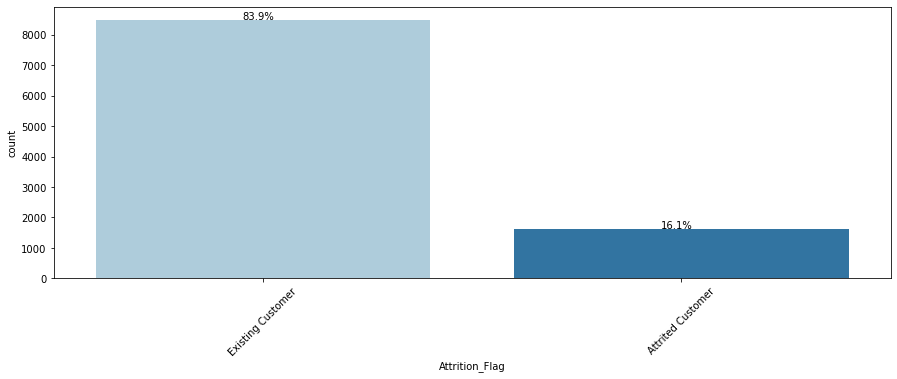

<IPython.core.display.Javascript object>

In [14]:
univariate_cat_plot(df, "Attrition_Flag")

16% customers are 'Attrited Customer'.

count   10127.000
mean       46.326
std         8.017
min        26.000
25%        41.000
50%        46.000
75%        52.000
max        73.000
Name: Customer_Age, dtype: float64


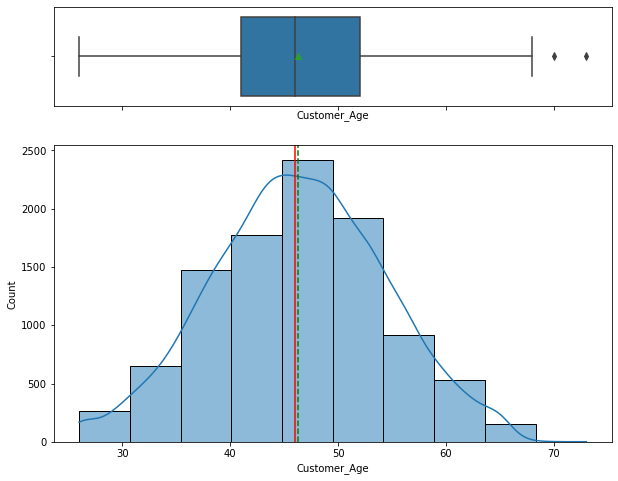

<IPython.core.display.Javascript object>

In [15]:
univariate_num_plot(df["Customer_Age"])

**Customer_Age** data is well distributed.

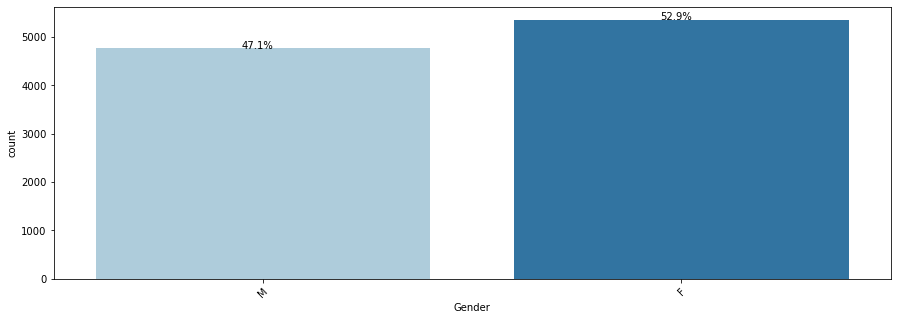

<IPython.core.display.Javascript object>

In [16]:
univariate_cat_plot(df, "Gender")

53% customers are Female.

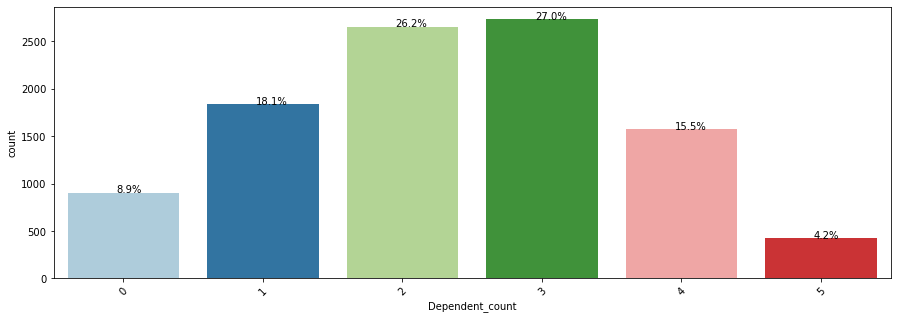

<IPython.core.display.Javascript object>

In [17]:
univariate_cat_plot(df, "Dependent_count")

Most customers has 2 or 3 dependents. Then customers has 1 or 4 dependents.

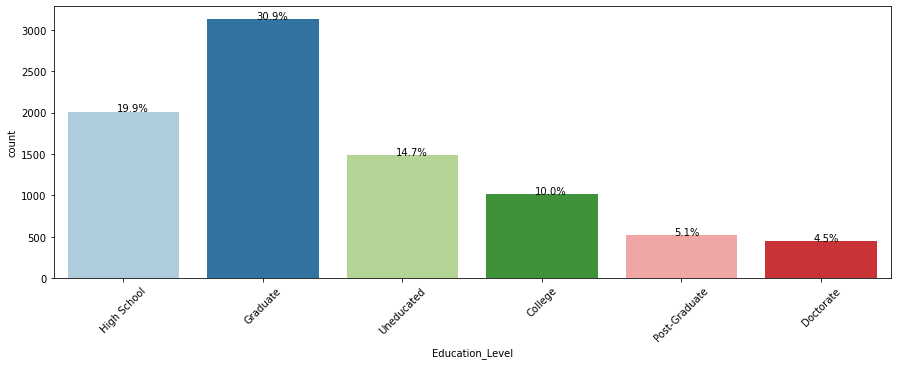

<IPython.core.display.Javascript object>

In [18]:
univariate_cat_plot(df, "Education_Level")

31% customers are 'Graduate', then customers are 'High School' or 'Uneducated'.

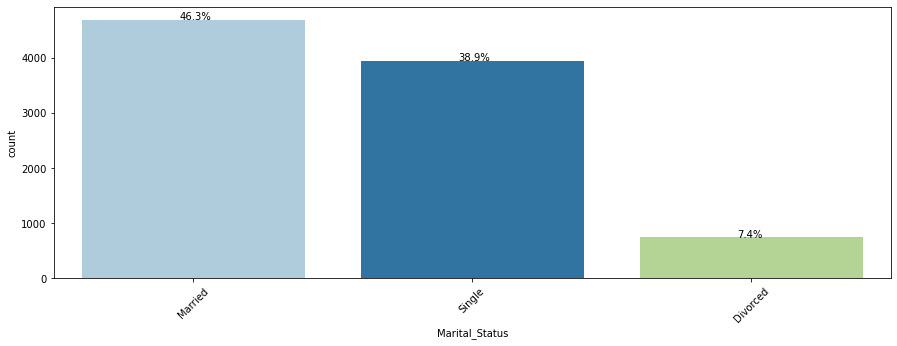

<IPython.core.display.Javascript object>

In [19]:
univariate_cat_plot(df, "Marital_Status")

Most customers are 'Married'. Then customers are 'Single' and few are 'Divorced'.

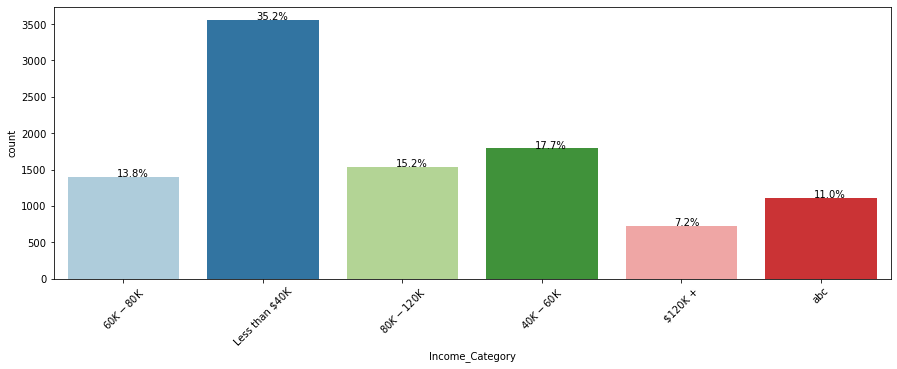

<IPython.core.display.Javascript object>

In [20]:
univariate_cat_plot(df, "Income_Category")

Most customers has less than $40K income.

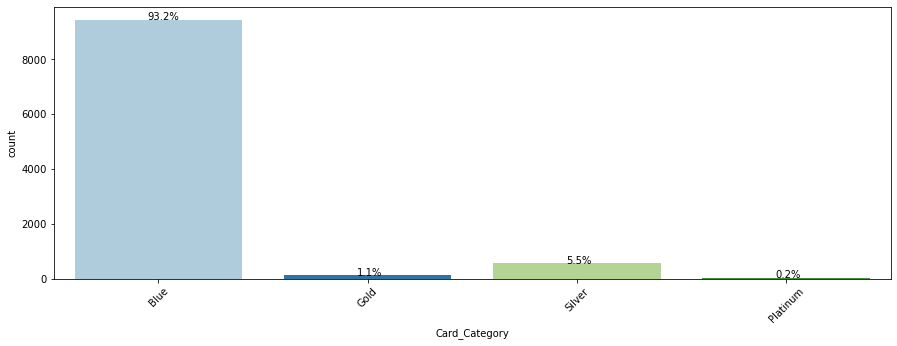

<IPython.core.display.Javascript object>

In [21]:
univariate_cat_plot(df, "Card_Category")

Maximum customers has 'Blue' card.

count   10127.000
mean       35.928
std         7.986
min        13.000
25%        31.000
50%        36.000
75%        40.000
max        56.000
Name: Months_on_book, dtype: float64


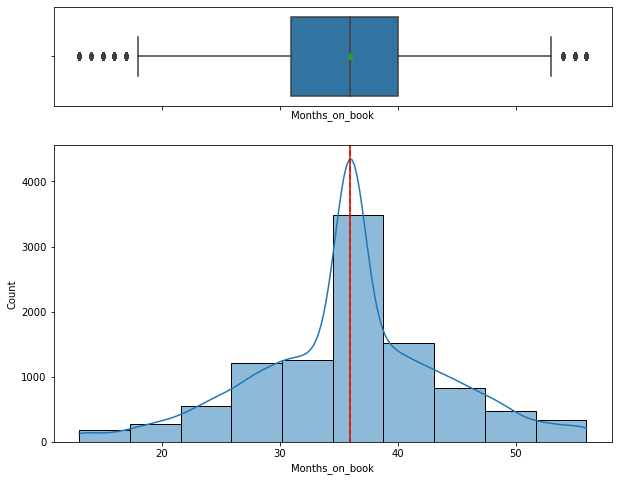

<IPython.core.display.Javascript object>

In [22]:
univariate_num_plot(df["Months_on_book"])

**Months_on_book** data is well distributed. 50% customers are between 31 to 40 range.

count   10127.000
mean        3.813
std         1.554
min         1.000
25%         3.000
50%         4.000
75%         5.000
max         6.000
Name: Total_Relationship_Count, dtype: float64


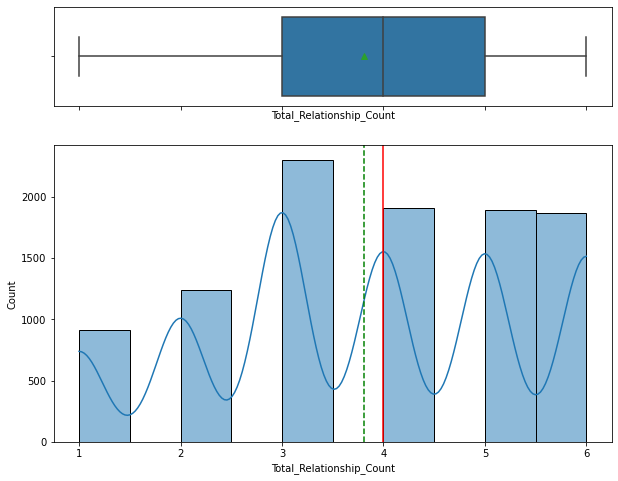

<IPython.core.display.Javascript object>

In [23]:
univariate_num_plot(df["Total_Relationship_Count"])

Most customers has 3 relationship.

count   10127.000
mean        2.341
std         1.011
min         0.000
25%         2.000
50%         2.000
75%         3.000
max         6.000
Name: Months_Inactive_12_mon, dtype: float64


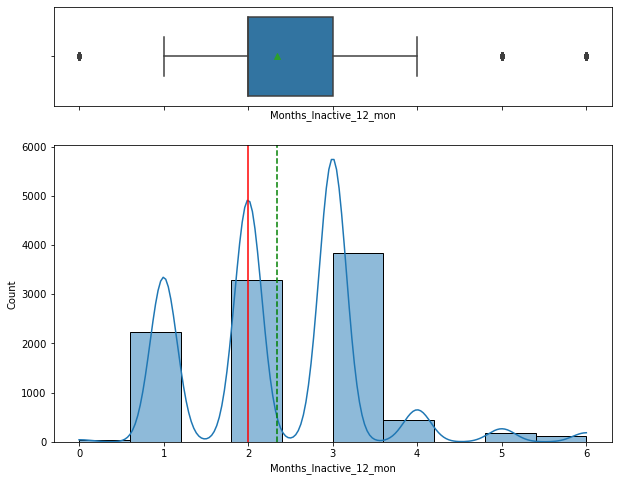

<IPython.core.display.Javascript object>

In [24]:
univariate_num_plot(df["Months_Inactive_12_mon"])

75% customers are inactive only for 3 months.

count   10127.000
mean        2.455
std         1.106
min         0.000
25%         2.000
50%         2.000
75%         3.000
max         6.000
Name: Contacts_Count_12_mon, dtype: float64


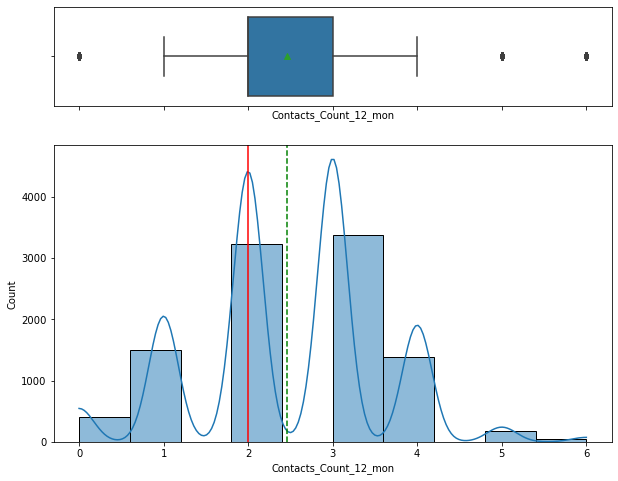

<IPython.core.display.Javascript object>

In [25]:
univariate_num_plot(df["Contacts_Count_12_mon"])

75% customers are contacted 3 times in 12 months.

count   10127.000
mean     8631.954
std      9088.777
min      1438.300
25%      2555.000
50%      4549.000
75%     11067.500
max     34516.000
Name: Credit_Limit, dtype: float64


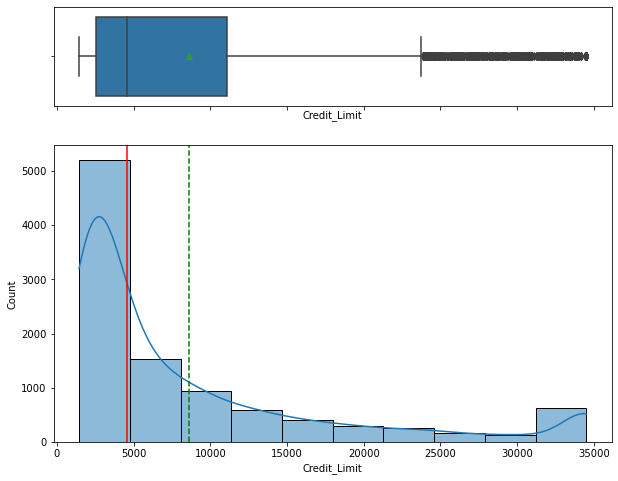

<IPython.core.display.Javascript object>

In [26]:
univariate_num_plot(df["Credit_Limit"])

The distribution of **Credit_Limit** is heavily right-skewed with a median is 4549. Also has lots of outlier.

count   10127.000
mean     1162.814
std       814.987
min         0.000
25%       359.000
50%      1276.000
75%      1784.000
max      2517.000
Name: Total_Revolving_Bal, dtype: float64


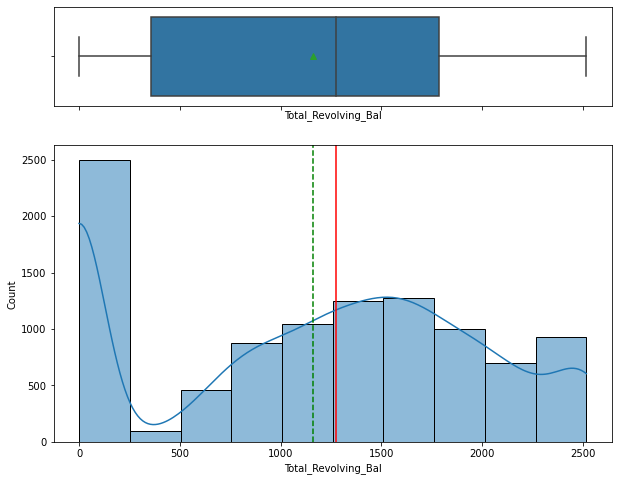

<IPython.core.display.Javascript object>

In [27]:
univariate_num_plot(df["Total_Revolving_Bal"])

The distribution of **Total_Revolving_Bal** is well balanced but most customers has Total_Revolving_Bal is near 0.

count   10127.000
mean     7469.140
std      9090.685
min         3.000
25%      1324.500
50%      3474.000
75%      9859.000
max     34516.000
Name: Avg_Open_To_Buy, dtype: float64


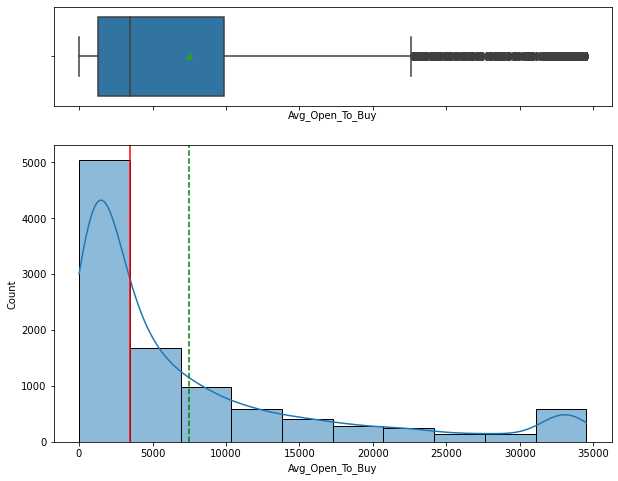

<IPython.core.display.Javascript object>

In [28]:
univariate_num_plot(df["Avg_Open_To_Buy"])

The distribution of **Avg_Open_To_Buy** is heavily right-skewed with a median is 3474. Also has lots of outlier.

count   10127.000
mean     4404.086
std      3397.129
min       510.000
25%      2155.500
50%      3899.000
75%      4741.000
max     18484.000
Name: Total_Trans_Amt, dtype: float64


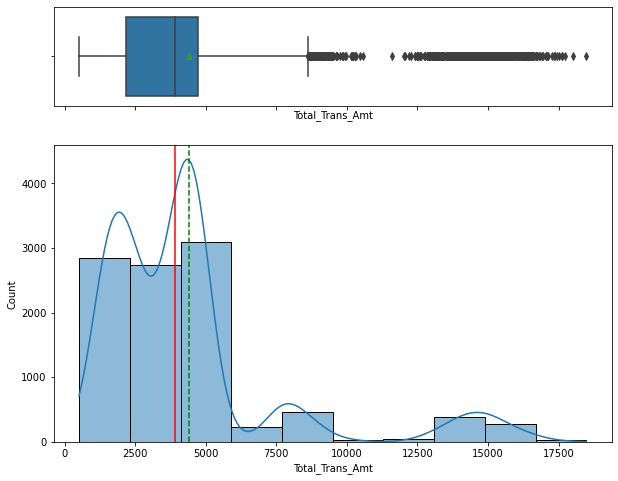

<IPython.core.display.Javascript object>

In [29]:
univariate_num_plot(df["Total_Trans_Amt"])

The distribution of **Total_Trans_Amt** is heavily right-skewed with a median is 3899. Also has lots of outlier.

count   10127.000
mean       64.859
std        23.473
min        10.000
25%        45.000
50%        67.000
75%        81.000
max       139.000
Name: Total_Trans_Ct, dtype: float64


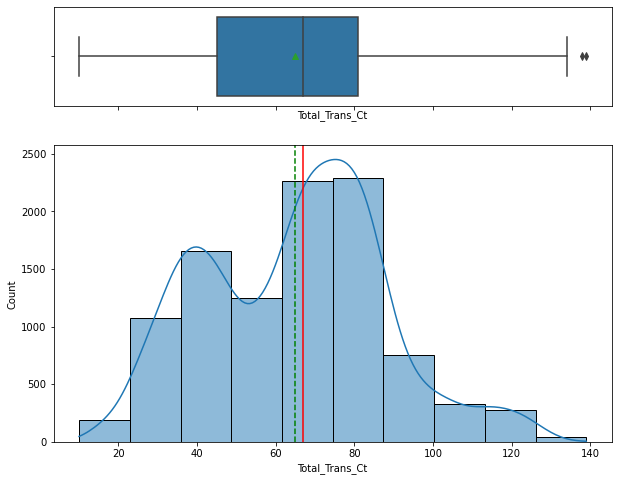

<IPython.core.display.Javascript object>

In [30]:
univariate_num_plot(df["Total_Trans_Ct"])

The distribution of **Total_Trans_Ct** is right-skewed with a median is 67.

count   10127.000
mean        0.712
std         0.238
min         0.000
25%         0.582
50%         0.702
75%         0.818
max         3.714
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


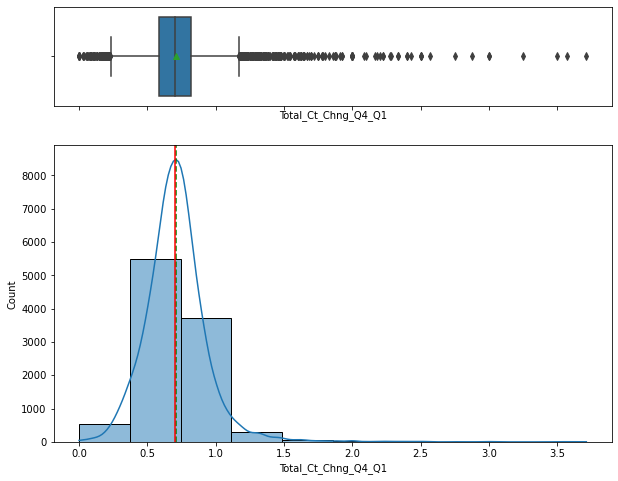

<IPython.core.display.Javascript object>

In [31]:
univariate_num_plot(df["Total_Ct_Chng_Q4_Q1"])

The distribution of **Total_Ct_Chng_Q4_Q1** is heavily right-skewed with a median is 0.702. Also has lots of outlier.

### Bivariate Analysis

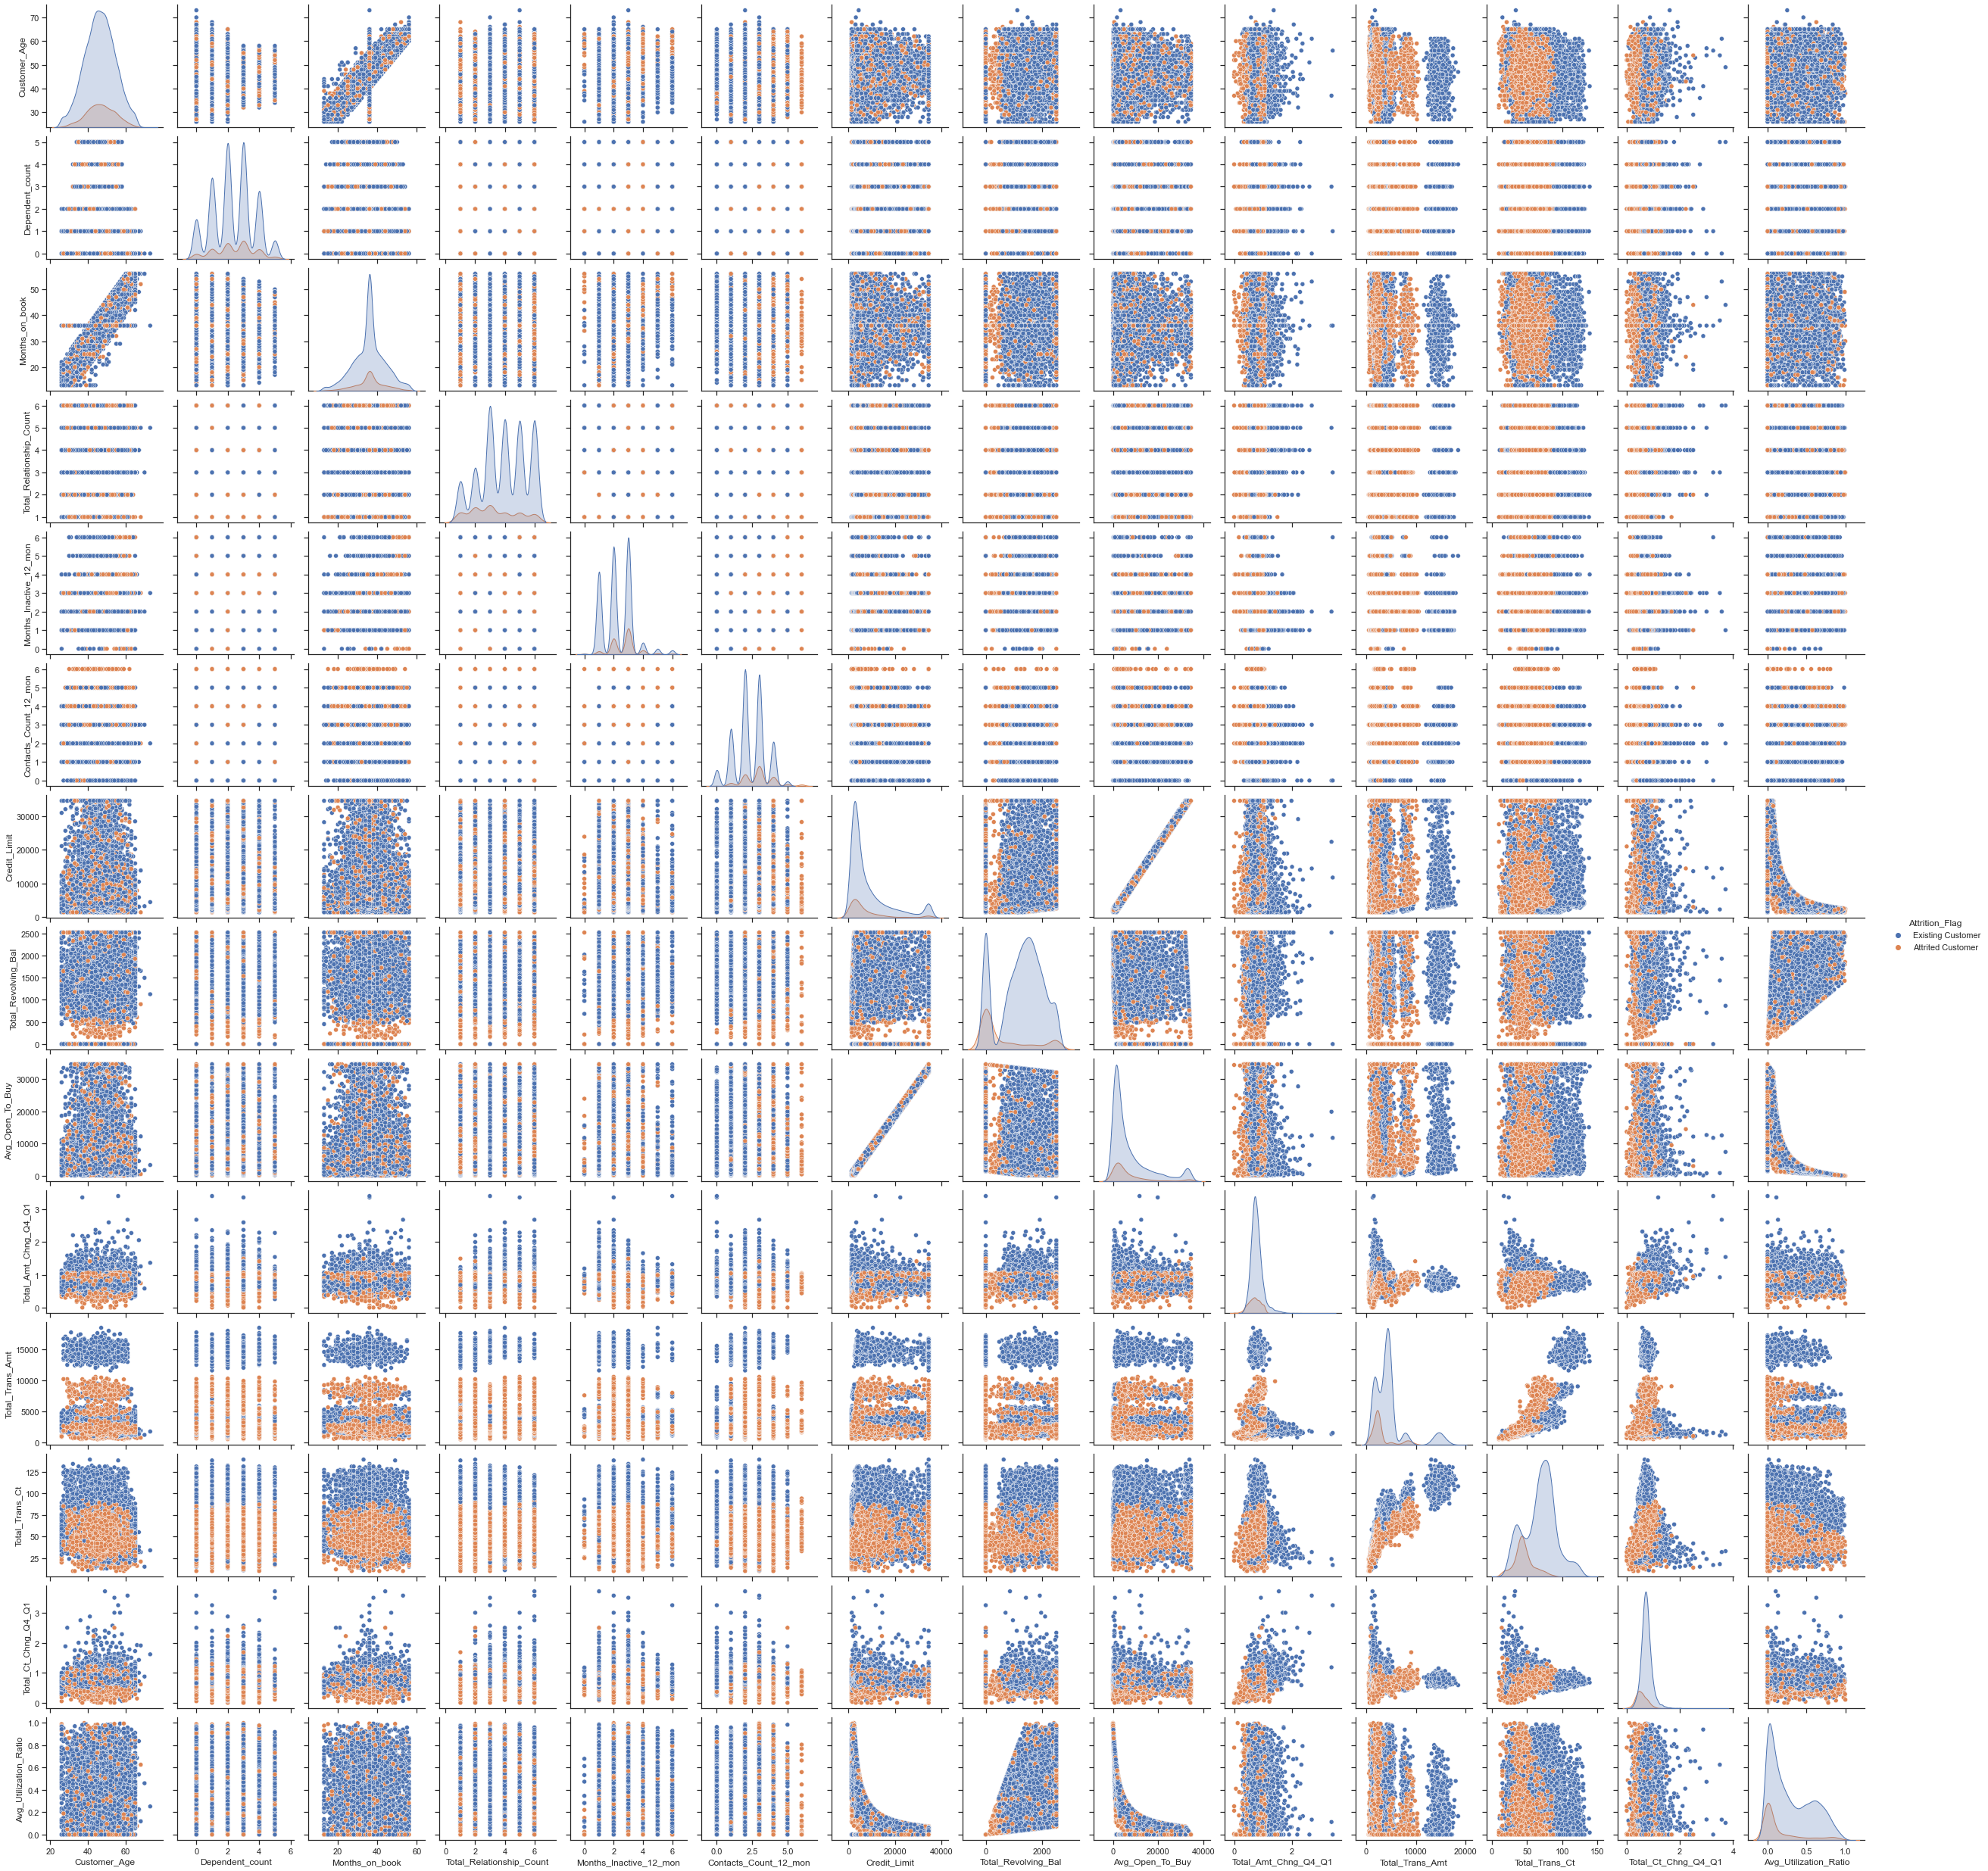

<IPython.core.display.Javascript object>

In [32]:
# using pairplot to understand the correlation of all the numerical columns.
sns.set_theme(style="ticks")
sns.pairplot(data=df, hue="Attrition_Flag")

### Heat map

<AxesSubplot:>

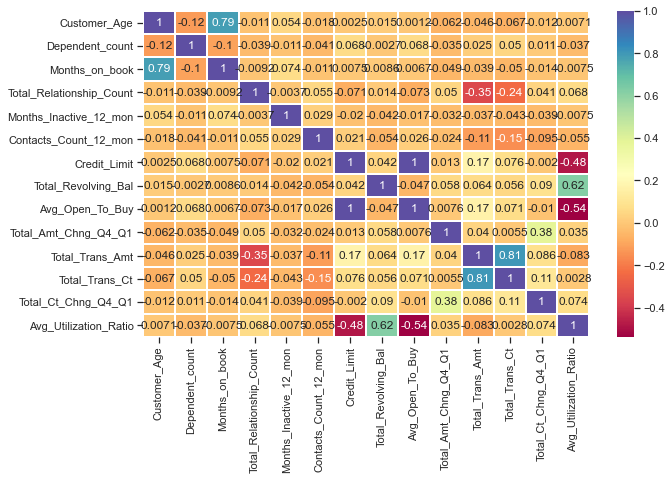

<IPython.core.display.Javascript object>

In [33]:
plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidths=1, cmap="Spectral")

### Key observations of numerical variables

* **Months_on_book** and **Customer_Age** has highly correlated.
* **Total_Trans_Amt** and **Total_Trans_Ct** has highly correlated.
* **Total_Revolving_Bal** and **Avg_Utilization_Ratio** has little correlated.
* Other has no correlation.

In [34]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [35]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

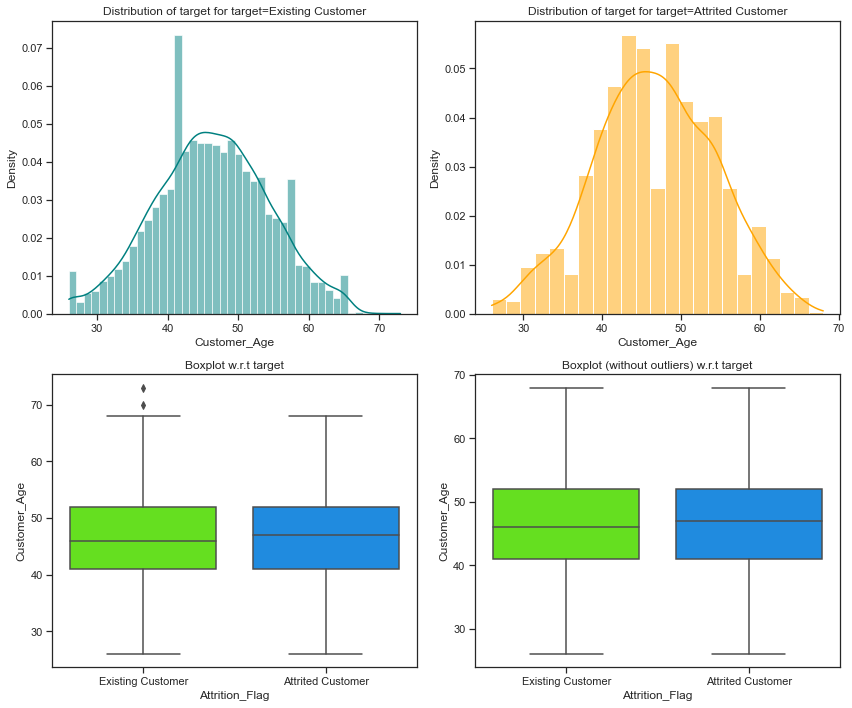

<IPython.core.display.Javascript object>

In [36]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


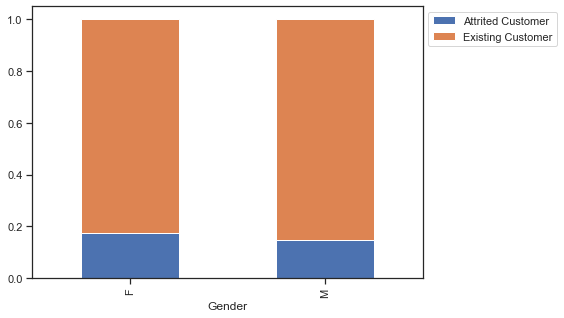

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(df, "Gender", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


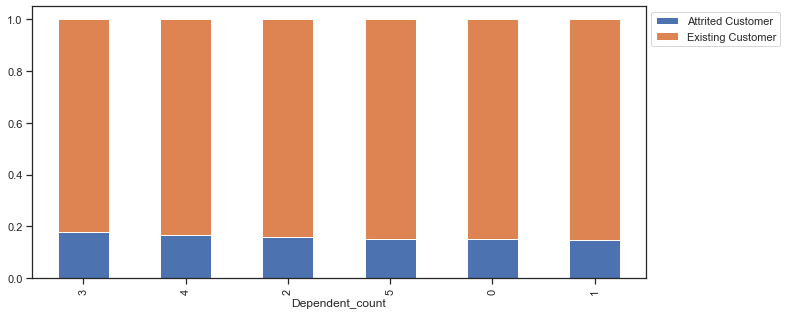

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


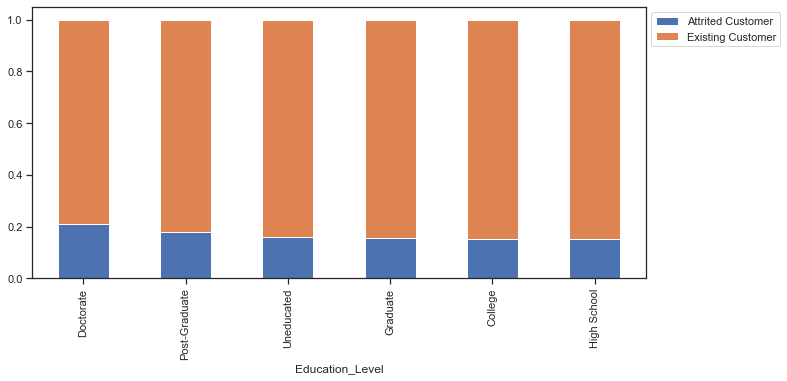

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


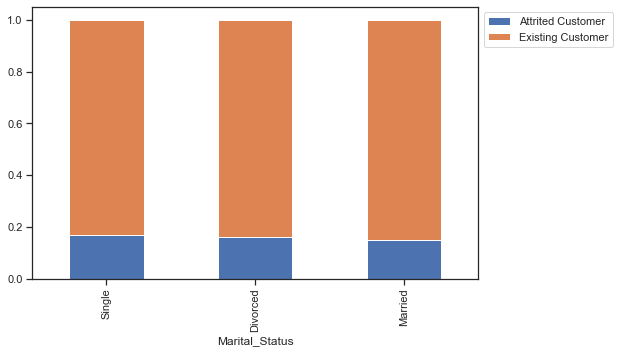

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


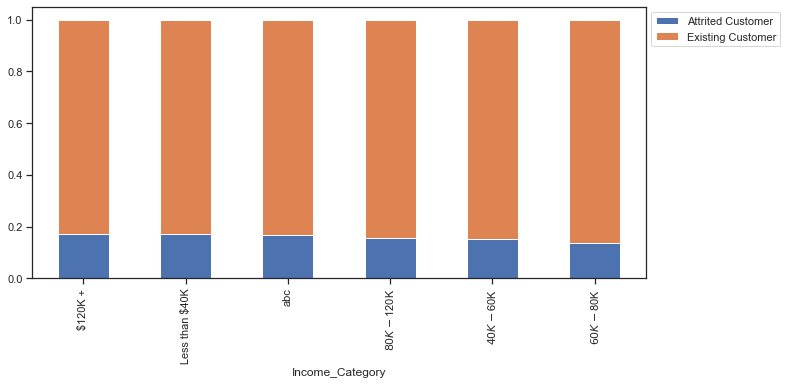

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


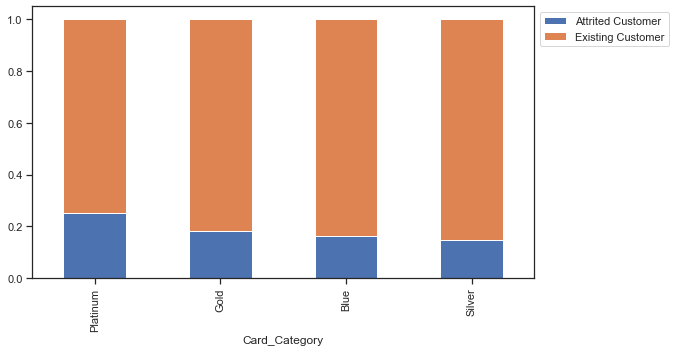

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(df, "Card_Category", "Attrition_Flag")

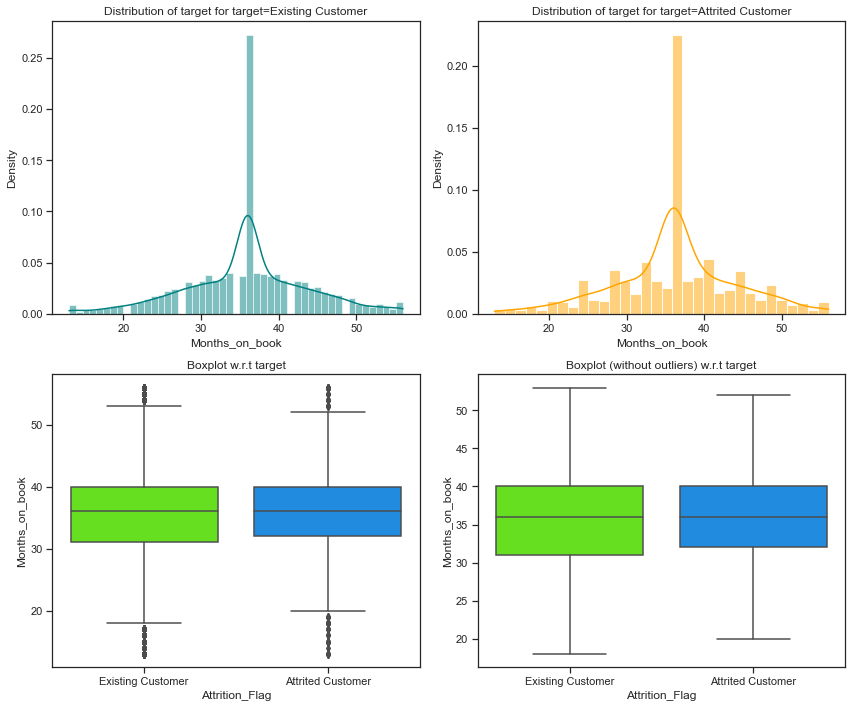

<IPython.core.display.Javascript object>

In [43]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


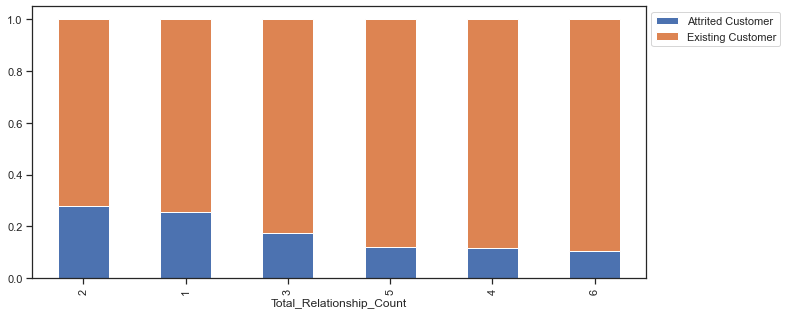

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

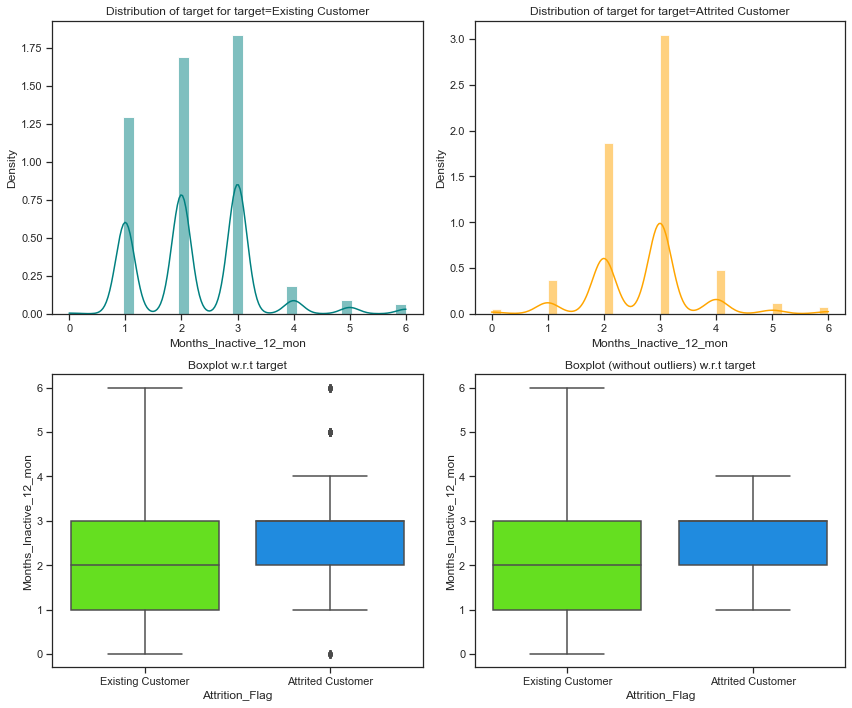

<IPython.core.display.Javascript object>

In [45]:
distribution_plot_wrt_target(df, "Months_Inactive_12_mon", "Attrition_Flag")

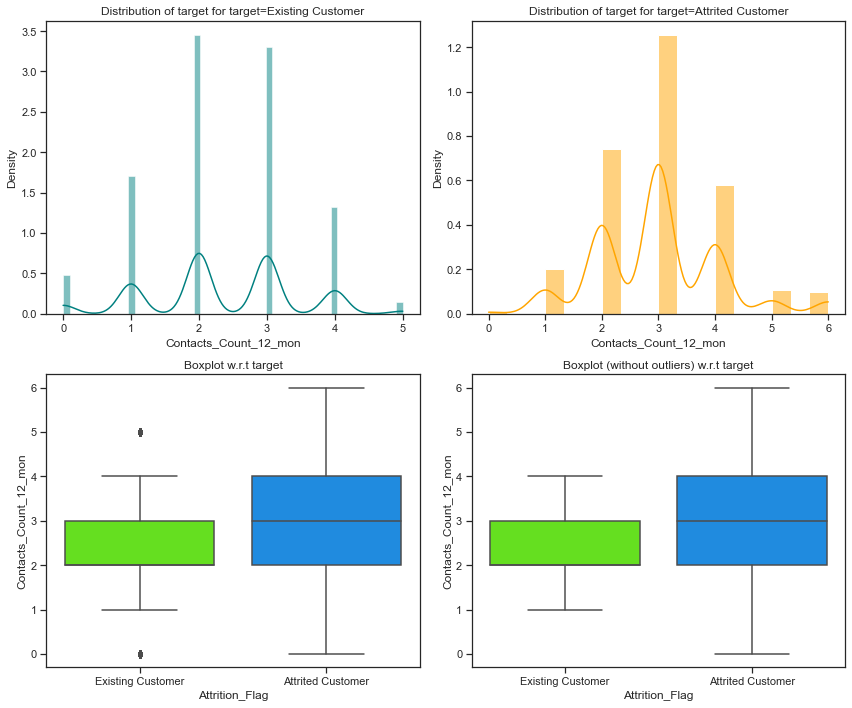

<IPython.core.display.Javascript object>

In [46]:
distribution_plot_wrt_target(df, "Contacts_Count_12_mon", "Attrition_Flag")

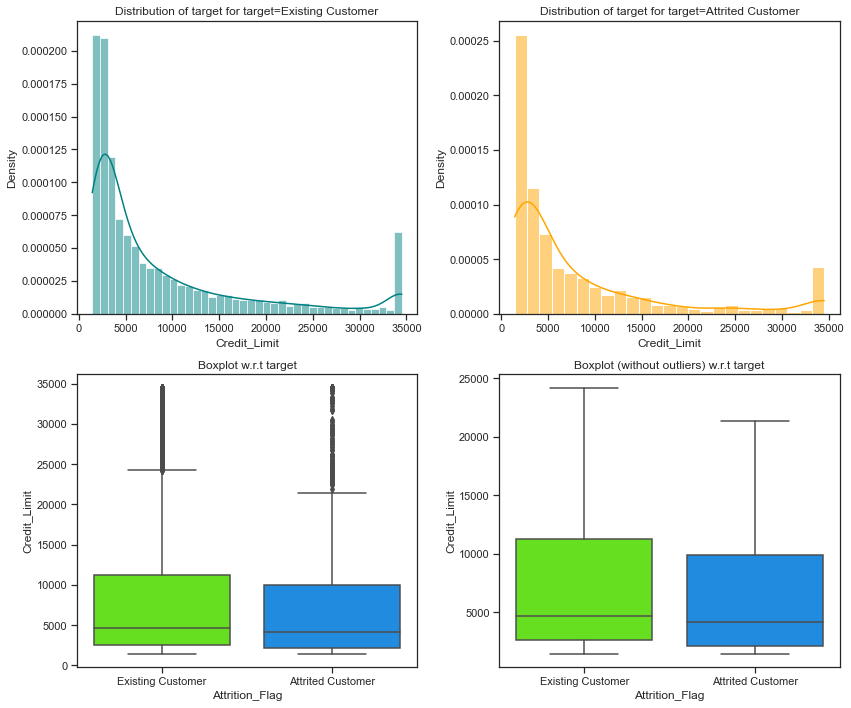

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

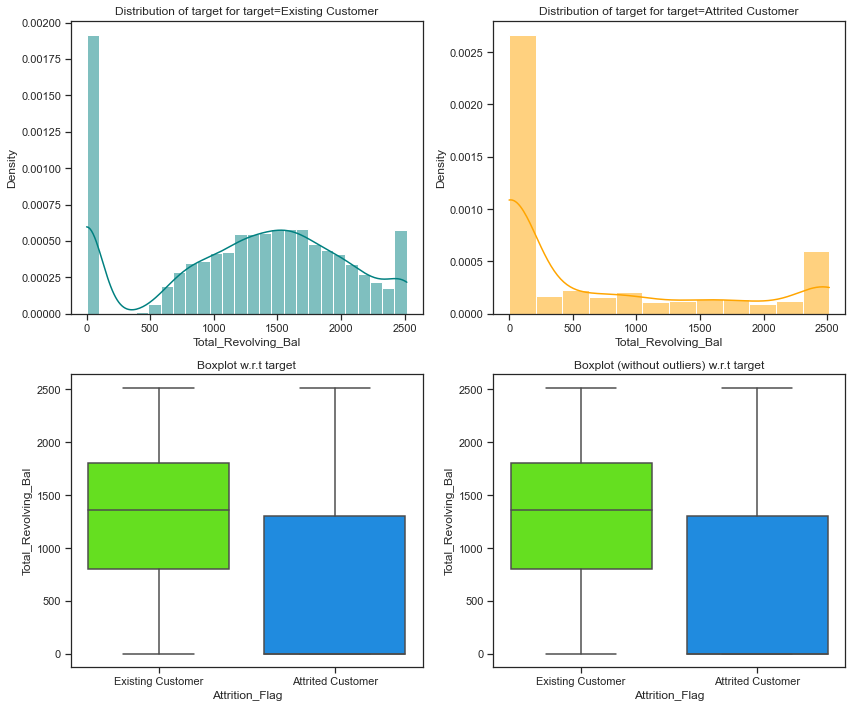

<IPython.core.display.Javascript object>

In [48]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

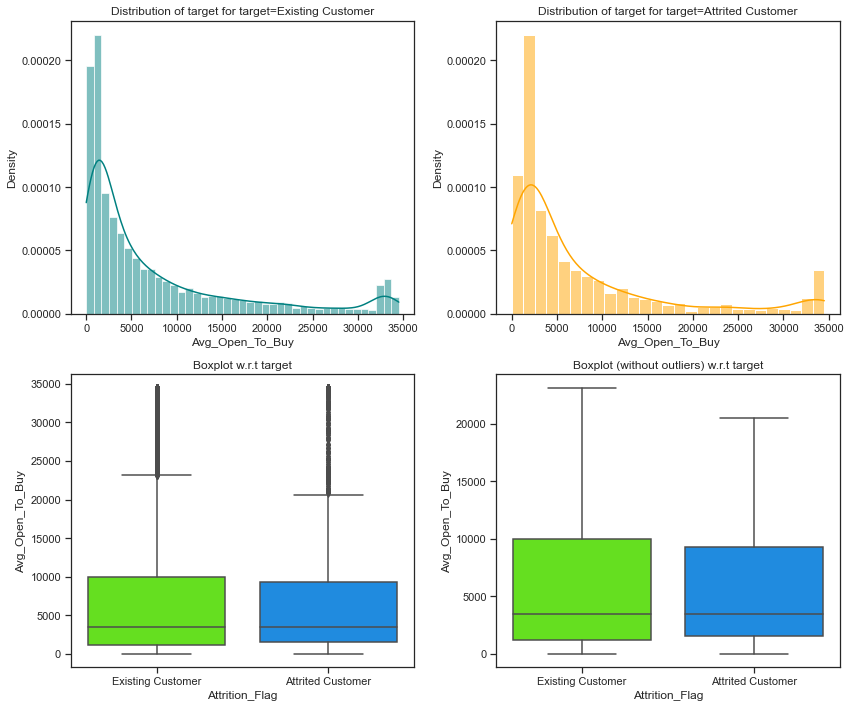

<IPython.core.display.Javascript object>

In [49]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

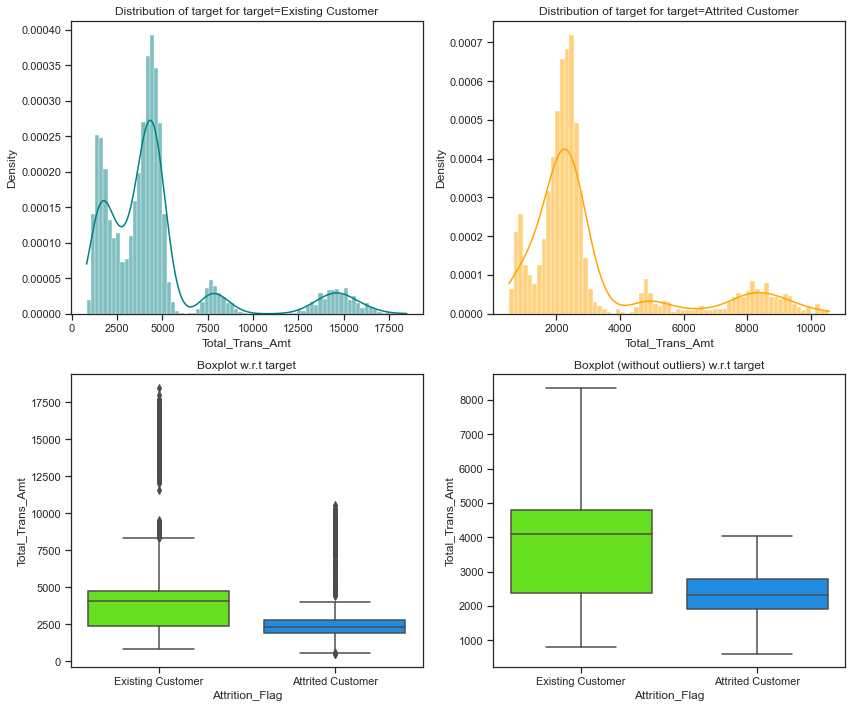

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

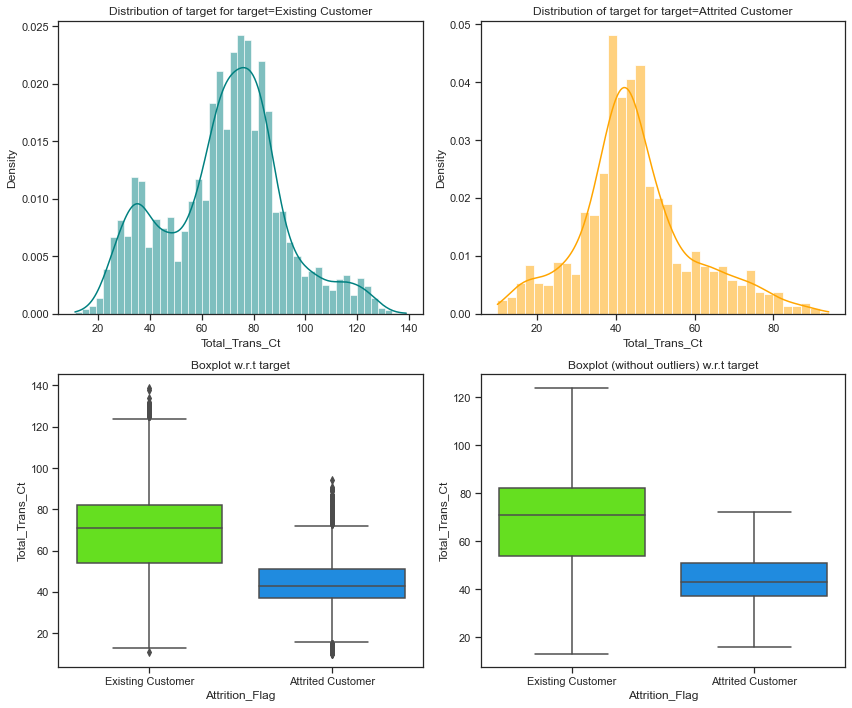

<IPython.core.display.Javascript object>

In [51]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

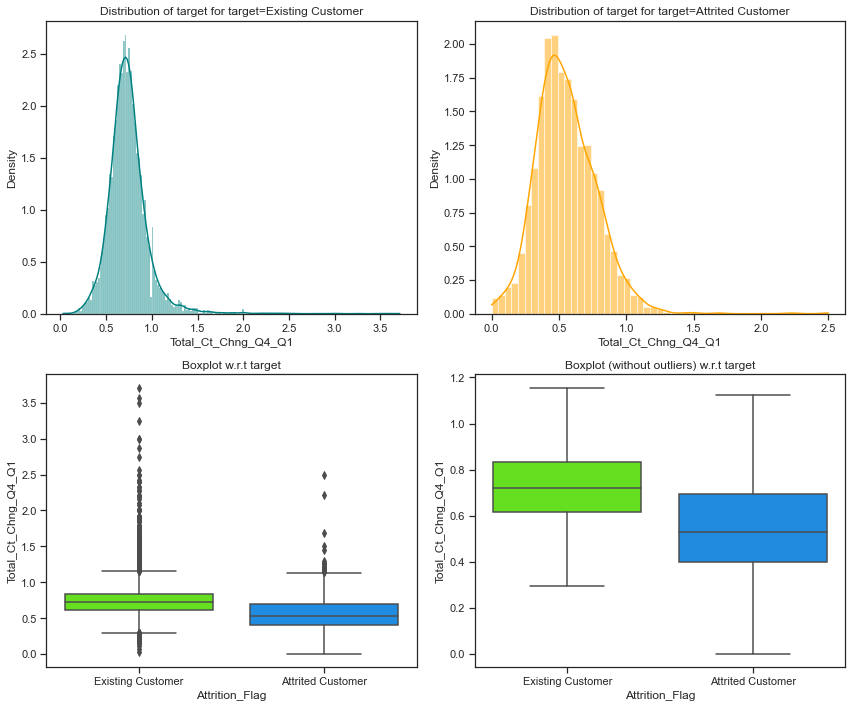

<IPython.core.display.Javascript object>

In [52]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

###  Summary of EDA
**Data Description:**

- There are no duplicate values in the dataset.
- 3 columns has missing values in the data.
- Most of the data-types are either **int64** , **float64** and **object**.


**Observations from EDA:**

* `Attrition_Flag`: 16% customer renounce their credit cards
* `Customer_Age`: Average age of customers in the dataset is 46 years, age has a wide range from 26 to 73 years.
* `Gender`: Female customers are more than Male customers.
* `Dependent_count`: Average is 2, Dependent count range from 0 to 5.
* `Education_Level`: 5 types of Education Level. Most customers are 'Graduate'.
* `Marital_Status`: 3 types of Marital Status. 'Married' customers are most.
* `Income_Category`: 5 types of Income Category. 'Less than $40K' customers are most.
* `Card_Category`: 4 types of Card Category. 'Blue' customers are most.
* `Months_on_book`: Average is 36, Months on book of customers range from 13 to 56.
* `Total_Relationship_Count`: Average is 4, Total Relationship Count of customers range from 1 to 6. 
* `Months_Inactive_12_mon`: Average is 2, Months Inactive 12 mon range from 0 to 6.
* `Contacts_Count_12_mon`: Average is 2, Contacts Count 12 mon range from 0 to 6.
* `Credit_Limit`: Average is 8632, Credit Limit of customers range from 1438.30 to 34516.00.
* `Total_Revolving_Bal`: Average is 1163, Total Revolving Bal of customers range from 0 to 2517.
* `Avg_Open_To_Buy`: Average is 7469, Avg Open To Buy of customers range from 3 to 34516. 
* `Total_Amt_Chng_Q4_Q1`: Average is 0.760, Total Amt Chng Q4 to Q1 of customers range from 0 to 3.397.
* `Total_Trans_Amt`: Average is 4404, Total Trans Amt of customers range from 510 to 18484.
* `Total_Trans_Ct`: Average is 65, Total Trans Ct of customers range from 10 to 139.
* `Total_Ct_Chng_Q4_Q1`: Average is 0.712, Total Ct Chng Q4 Q1 range from 0 to 3.714.
* `Avg_Utilization_Ratio`: Average is 0.275, Avg Utilization Ratio range from 0 to 0.999.

### Data Pre-Processing

In [53]:
df_pre = df.copy()  # copy data for preprocessing

<IPython.core.display.Javascript object>

## Feature Engineering

### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.


**The values obtained might not be integer always which is not be the best way to impute categorical values**
- To take care of that we will round off the obtained values to nearest integer value

In [54]:
df_pre.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [55]:
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [56]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "Education_Level",
    "Marital_Status",
    "Income_Category",
]

<IPython.core.display.Javascript object>

In [57]:
df_pre[reqd_col_for_impute].head()

Education_Level Marital_Status Income_Category
0     High School        Married     $60K - $80K
1        Graduate         Single  Less than $40K
2        Graduate        Married    $80K - $120K
3     High School            NaN  Less than $40K
4      Uneducated        Married     $60K - $80K

<IPython.core.display.Javascript object>

In [58]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them

Education_Level = {
    "Graduate": 0,
    "High School": 1,
    "Uneducated": 2,
    "College": 3,
    "Post-Graduate": 4,
    "Doctorate": 5,
}
df_pre["Education_Level"] = df_pre["Education_Level"].map(Education_Level)

Marital_Status = {
    "Married": 0,
    "Single": 1,
    "Divorced": 2,
}
df_pre["Marital_Status"] = df_pre["Marital_Status"].map(Marital_Status)

Income_Category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4,
}
df_pre["Income_Category"] = df_pre["Income_Category"].map(Income_Category)

Attrition_Flag = {
    "Existing Customer":0,
    "Attrited Customer":1
}
df_pre["Attrition_Flag"] = df_pre["Attrition_Flag"].map(Attrition_Flag)


<IPython.core.display.Javascript object>

In [59]:
df_pre.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
0               0            45      M                3            1.000   
1               0            49      F                5            0.000   
2               0            51      M                3            0.000   
3               0            40      F                4            1.000   
4               0            40      M                3            2.000   

   Marital_Status  Income_Category Card_Category  Months_on_book  \
0           0.000            2.000          Blue              39   
1           1.000            0.000          Blue              44   
2           0.000            3.000          Blue              36   
3             NaN            0.000          Blue              34   
4           0.000            2.000          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

<IPython.core.display.Javascript object>

### Define dependent and independent variables

In [60]:
X = df_pre.drop(["Attrition_Flag"], axis=1)
y = df_pre["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [61]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


<IPython.core.display.Javascript object>

In [62]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


<IPython.core.display.Javascript object>

**Imputing Missing Values**

In [63]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [64]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

<IPython.core.display.Javascript object>

In [65]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

<IPython.core.display.Javascript object>

In [66]:
inverse_mapping(Education_Level, "Education_Level")
inverse_mapping(Marital_Status, "Marital_Status")
inverse_mapping(Income_Category, "Income_Category")

<IPython.core.display.Javascript object>

* Checking inverse mapped values/categories.

In [67]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         1907
High School      1863
Uneducated       1095
College           644
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3093
Single      2525
Divorced     457
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2129
$40K - $60K       1477
$80K - $120K      1034
$60K - $80K        986
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [68]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         634
High School      610
Uneducated       379
College          203
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1039
Single       817
Divorced     170
Name: Marital_Status, dtype: int64
******************************
Less than $40K    736
$40K - $60K       503
$60K - $80K       326
$80K - $120K      325
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [69]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         666
High School      589
Uneducated       367
College          203
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     997
Single      859
Divorced    170
Name: Marital_Status, dtype: int64
******************************
Less than $40K    696
$40K - $60K       510
$60K - $80K       349
$80K - $120K      329
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

### Creating Dummy Variables

In [70]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


<IPython.core.display.Javascript object>

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [71]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(
    ("Logistic Regression", LogisticRegression(random_state=1, max_iter=2000))
)
models.append(("Decision Trees", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(
    ("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=1))
)
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(
    (
        "Xgboost",
        XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 48.76609105180534
Decision Trees: 77.2553636839351
Bagging: 78.585557299843
Random forest: 75.20198848770278
Gradient Boosting Classifier: 82.06593406593407
Adaboost: 81.45002616431188
Xgboost: 86.16535845107273

Training Performance:

Logistic Regression: 48.87295081967213
Decision Trees: 100.0
Bagging: 98.15573770491804
Random forest: 100.0
Gradient Boosting Classifier: 87.70491803278688
Adaboost: 83.70901639344262
Xgboost: 100.0


<IPython.core.display.Javascript object>

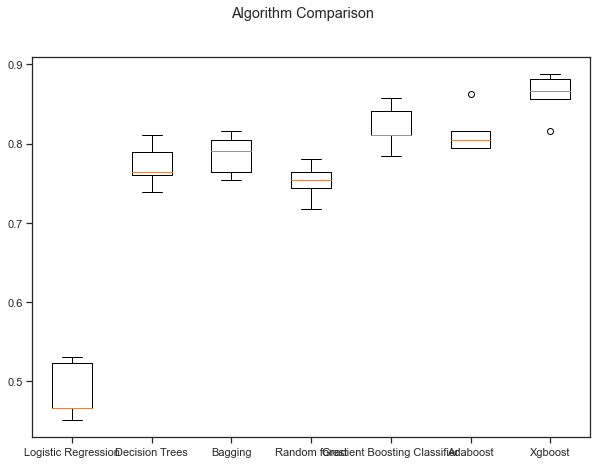

<IPython.core.display.Javascript object>

In [72]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by Gradient Boosting.
- The boxplot shows that the performance of xgboost is consistent with 1 outlier. 

### Oversampling train data using SMOTE

In [73]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

In [74]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(
    (
        "Logistic Regression Oversampling",
        LogisticRegression(random_state=1, max_iter=5000),
    )
)
models_over.append(
    ("Decision Trees Oversampling", DecisionTreeClassifier(random_state=1))
)
models_over.append(("Bagging Oversampling", BaggingClassifier(random_state=1)))
models_over.append(
    ("Random forest Oversampling", RandomForestClassifier(random_state=1))
)
models_over.append(
    (
        "Gradient Boosting Classifier Oversampling",
        GradientBoostingClassifier(random_state=1),
    )
)
models_over.append(("Adaboost Oversampling", AdaBoostClassifier(random_state=1)))
models_over.append(
    (
        "Xgboost Oversampling",
        XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False),
    )
)

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression Oversampling: 87.7235467297812
Decision Trees Oversampling: 94.90121033693161
Bagging Oversampling: 96.3327753083569
Random forest Oversampling: 97.78381342723547
Gradient Boosting Classifier Oversampling: 97.17598953222112
Adaboost Oversampling: 96.35217148684794
Xgboost Oversampling: 98.29377128672864

Training Performance:

Logistic Regression Oversampling: 88.42910374583252
Decision Trees Oversampling: 100.0
Bagging Oversampling: 99.7254363600706
Random forest Oversampling: 100.0
Gradient Boosting Classifier Oversampling: 98.03883114336143
Adaboost Oversampling: 96.68562463228085
Xgboost Oversampling: 100.0


<IPython.core.display.Javascript object>

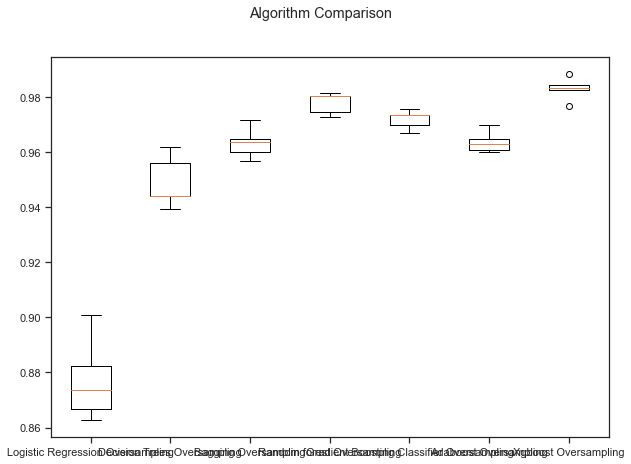

<IPython.core.display.Javascript object>

In [75]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by Random forest.
- The boxplot shows that the performance of xgboost is consistent with 2 outlier.

### Undersampling train data using Random Under Sampler

In [76]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [77]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 29)
After Undersampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [78]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(
    (
        "Logistic Regression Undersampling",
        LogisticRegression(random_state=1, max_iter=1000),
    )
)
models_un.append(
    ("Decision Trees Undersampling", DecisionTreeClassifier(random_state=1))
)
models_un.append(("Bagging Undersampling", BaggingClassifier(random_state=1)))
models_un.append(
    ("Random forest Undersampling", RandomForestClassifier(random_state=1))
)
models_un.append(
    (
        "Gradient Boosting Classifier Undersampling",
        GradientBoostingClassifier(random_state=1),
    )
)
models_un.append(("Adaboost Undersampling", AdaBoostClassifier(random_state=1)))
models_un.append(
    (
        "Xgboost Undersampling",
        XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False),
    )
)

results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_un:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results_un.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression Undersampling: 81.66038723181579
Decision Trees Undersampling: 88.83097854526426
Bagging Undersampling: 91.39455782312925
Random forest Undersampling: 93.03401360544218
Gradient Boosting Classifier Undersampling: 94.05808477237049
Adaboost Undersampling: 93.13605442176872
Xgboost Undersampling: 95.39037153322867

Training Performance:

Logistic Regression Undersampling: 82.17213114754098
Decision Trees Undersampling: 100.0
Bagging Undersampling: 99.18032786885246
Random forest Undersampling: 100.0
Gradient Boosting Classifier Undersampling: 97.95081967213115
Adaboost Undersampling: 95.38934426229508
Xgboost Undersampling: 100.0


<IPython.core.display.Javascript object>

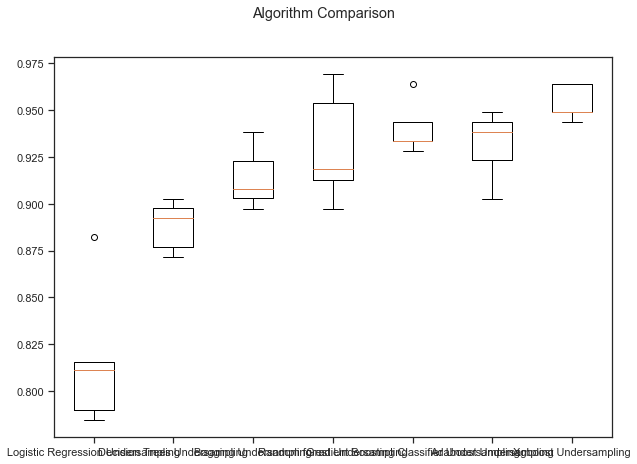

<IPython.core.display.Javascript object>

In [79]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names_un)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by Gradient Boosting.
- The boxplot shows that the performance of xgboost is consistent.

## Hyperparameter Tuning

**Xgboost with Oversampling train data has highest cross-validated recall then Random Forest with Oversampling train data has highest cross-validated recall and then Gradient Boosting with Oversampling train data has highest cross-validated recall. We will tune Random Forest, Gradient Boosting and xgboost models using RandomizedSearchCV. We will also compare the performance of these three models.**

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [80]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [81]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Random Forest Classifier
**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.

Training performance:
    Accuracy  Recall  Precision    F1
0     0.999   1.000      0.999 0.999
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.964   0.908      0.876 0.892
CPU times: user 7.53 s, sys: 422 ms, total: 7.95 s
Wall time: 29.5 s


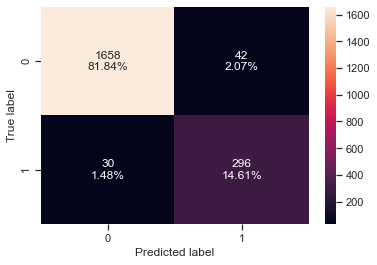

<IPython.core.display.Javascript object>

In [82]:
%%time
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": [2, 4, 6],
    "n_estimators": [10, 17, 25, 33, 41, 48, 56, 64, 72, 80]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_jobs = -1, scoring=acc_scorer, cv=10, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_estimator_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train_over, y_train_over)

# Calculating different metrics
rf_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_estimator_tuned, X_train_over, y_train_over
)
print("Training performance:\n", rf_estimator_tuned_model_train_perf)

rf_estimator_tuned_model_val_perf = model_performance_classification_sklearn(
    rf_estimator_tuned, X_val, y_val
)
print("Validation performance:\n", rf_estimator_tuned_model_val_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned, X_val, y_val)

### Gradient Boosting Classifier

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.968   0.905      0.899 0.902
CPU times: user 16.4 s, sys: 487 ms, total: 16.9 s
Wall time: 2min 1s


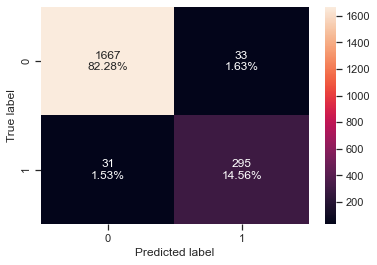

<IPython.core.display.Javascript object>

In [83]:
%%time
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_jobs = -1, scoring=acc_scorer, cv=10, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gbc_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train_over, y_train_over)

# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train_over, y_train_over
)
print("Training performance \n", gbc_tuned_model_train_perf)

gbc_tuned_model_val_perf = model_performance_classification_sklearn(
    gbc_tuned, X_val, y_val
)
print("Testing performance \n", gbc_tuned_model_val_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

### XGBoost Classifier

Training performance 
    Accuracy  Recall  Precision    F1
0     0.886   0.999      0.814 0.897
Testing performance 
    Accuracy  Recall  Precision    F1
0     0.806   0.994      0.453 0.622
CPU times: user 1.73 s, sys: 148 ms, total: 1.88 s
Wall time: 27 s


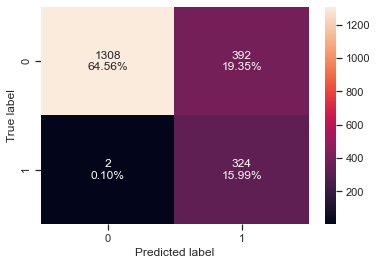

<IPython.core.display.Javascript object>

In [84]:
%%time
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_jobs = -1, scoring=acc_scorer, cv=10, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_over, y_train_over)

# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train_over, y_train_over
)
print("Training performance \n", xgb_tuned_model_train_perf)

xgb_tuned_model_val_perf = model_performance_classification_sklearn(
    xgb_tuned, X_val, y_val
)
print("Testing performance \n", xgb_tuned_model_val_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

## Comparing all tuned models

In [85]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_estimator_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Tuned with Random Search",
    "Gradient Boosting Tuned with Random Search",
    "XGBoost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Random Forest Tuned with Random Search  \
Accuracy                                    0.999   
Recall                                      1.000   
Precision                                   0.999   
F1                                          0.999   

           Gradient Boosting Tuned with Random Search  \
Accuracy                                        1.000   
Recall                                          1.000   
Precision                                       1.000   
F1                                              1.000   

           XGBoost Tuned with Random Search  
Accuracy                              0.886  
Recall                                0.999  
Precision                             0.814  
F1                                    0.897

<IPython.core.display.Javascript object>

In [86]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf_estimator_tuned_model_val_perf.T,
        gbc_tuned_model_val_perf.T,
        xgb_tuned_model_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random Forest Tuned with Random Search",
    "Gradient Boosting Tuned with Random Search",
    "XGBoost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Random Forest Tuned with Random Search  \
Accuracy                                    0.964   
Recall                                      0.908   
Precision                                   0.876   
F1                                          0.892   

           Gradient Boosting Tuned with Random Search  \
Accuracy                                        0.968   
Recall                                          0.905   
Precision                                       0.899   
F1                                              0.902   

           XGBoost Tuned with Random Search  
Accuracy                              0.806  
Recall                                0.994  
Precision                             0.453  
F1                                    0.622

<IPython.core.display.Javascript object>

- The xgboost model tuned using Random search is giving the best validation recall of 0.995 but it has the low values of validation precision.
- Let's check the model's performance on test set and then see the feature importance from the tuned xgboost model

#### Performance on the test set

In [87]:
# Calculating different metrics on the test set
model_grid_test = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Test performance:")
model_grid_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.798   1.000      0.442 0.613

<IPython.core.display.Javascript object>

- The performance on test data is generalised

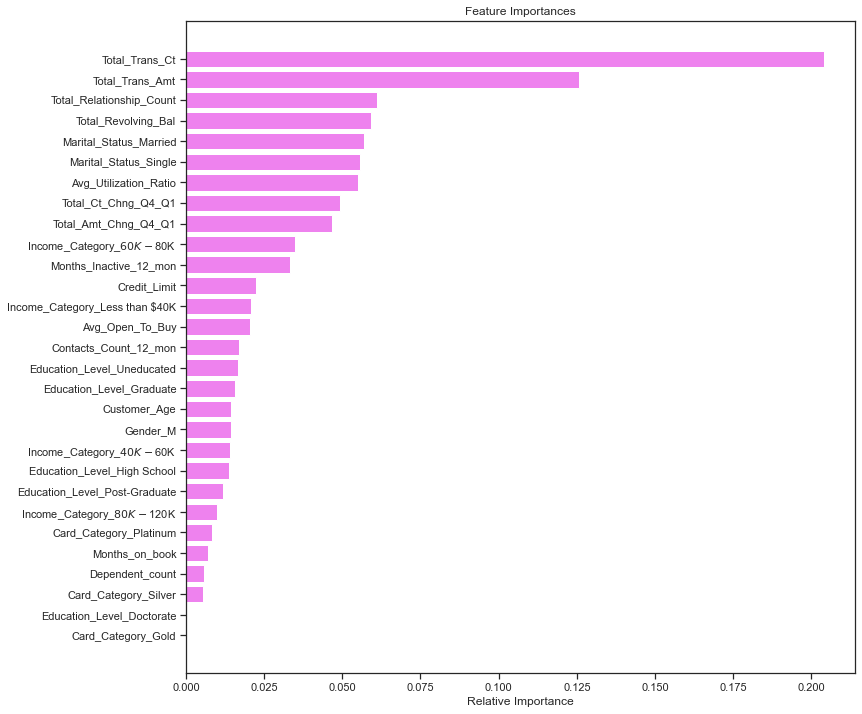

<IPython.core.display.Javascript object>

In [88]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Ct is the most important feature, followed by Total_Trans_Amt and Total_Relationship_Count.

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [89]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Total_Amt_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [90]:
# Separating target variable and other variables
X = df_pre.drop(columns="Attrition_Flag")
Y = df_pre["Attrition_Flag"]

<IPython.core.display.Javascript object>

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [91]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

In [92]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.05,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=1,
                use_label_encoder=False,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                            

<IPython.core.display.Javascript object>

In [93]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>

## Business Insights and Recommendations

* Bank should target customers who are doing more Transactions and also spending more. Bank should also concentrate on those customers who have more dependents.
* We observed in our analysis that most customers are married and single customers, are more equally or more likely to take the offer. The bank should expand its customers by customizing offers to attract more divorced customers.
* Customers who are frequent buyers, should be targeted more by the bank and offer them added benefits.
* Total amount spent has decreased over the quaters . Bank should constantly improve its Contacts Count to address such issues.
* Customers who has income less than $40K, should be targeted more by the bank and offer them added benefits.
* Bank should target blue card customers more.